In [32]:
from math import sqrt
import autograd
from autograd import numpy as np
import time

def f(x,y) : 
    return(x**2+y**2 - 0.5)
    
    
def find_seed(g, c=0, eps=2**(-26)) :
    fa, fb = g(0.0,0.0), g(0.0,1.0)
    
    # on teste si on se trouve dans le cas du TVI
    if (fa > c and fb > c) or (fa < c and fb < c) :
        raise ValueError("Dichotomie impossible")
    
    # on est dans le cas du TVI
    else :
        # on chercher qui de fa ou de fb est plus grand que c
        fpetit = min(fa, fb)
        fgrand = max(fa,fb)
        if fpetit == fa :
            petit, grand = 0, 1
        else :
            petit, grand = 1, 0
            
        m = (petit + grand)/2 
        fm = g(0,m)
        
        while (abs(fm - c) > eps) : 
            if fm >= c :
                grand, fgrand = m, fm
            else :
                petit, fpetit = m, fm
            m = (petit + grand)/2
            fm = g(0,m)
            
        return float(m)

def norme(X):
    return sqrt(X[0][0]**2 + X[1][0]**2)

def J_F(F,a,b) :
        j = autograd.jacobian
        return np.c_[j(F,0)(float(a),float(b)), j(F,1)(float(a),float(b))]
    
def Newton(F, v, eps = 2**(-26), maxiter = 100) :
    for _ in range(maxiter) : 
        J_inv = np.linalg.inv(J_F(F, v[0][0],v[1][0]))
        X = v - np.dot(J_inv, F(v[0][0],v[1][0]).T)
        if (norme(X-v) < eps ) : 
            return X
        else :
            v = X
    return(X)

def gradient_f(f,a,b) :
    g = autograd.grad
    return np.r_[g(f,0)(float(a),float(b)), g(f,1)(float(a),float(b))]
                              
def pointProche_1(f,x,y, delta) :
    grad = gradient_f(f,float(x),float(y))
    v = np.array([[-grad[1]],[grad[0]]])   
    n = norme(v)
     # penser au vecteur nul 
    return np.array([[x],[y]]) + (v/n)*delta

def pointProche_2(f,x,y, delta) :
    grad = gradient_f(f,float(x),float(y))
    v = np.array([[grad[1]],[-grad[0]]])   
    n = norme(v)
     # penser au vecteur nul 
    return np.array([[x],[y]]) + (v/n)*delta    

def NonPresent(a,b,x,y) :
    non = True
    for i in range(1,min(4,len(x))) :
        if non and a==x[len(x)-i] and b==y[len(y)-i] :
            non = False
    return non
    
                              
def simple_contour( f, c=0.0, delta= 0.01): 
    x, y = [], []
    try :
        yo = find_seed(f,c)
    except ValueError :
        return x,y
    
    x.append(0)
    y.append(float(yo))
    
    #on a trouvé le premier point    
    bool_continuation = True
    
    def F(a,b) :
             return np.array([f(a,b)-c, (a-x[-1])**2 + (b-y[-1])**2 - delta**5])
        
    premier_grad = gradient_F(f,x[-1],y[-1])
    
    if premier_grad[1] >= 0 :
        pointProche = lambda f,x,y,delta : pointProche_2(f,x,y,delta)
    else :
        pointProche = lambda f,x,y,delta : pointProche_1(f,x,y,delta)
    
    
    while bool_continuation : 
        
        # on cherche un premier point proche
        v = pointProche(f,x[-1],y[-1], delta)
        X = Newton(F,v)
        # (a,b) vérifie les conditions voulues pour faire partie de la ligne de niveau
        a,b = X[0,0],X[1,0]
        if a>=0 and a<=1 and b>=0 and b<=1 :
            x.append(a)
            y.append(b)
        else :
            bool_continuation = False
    
    return x,y

In [39]:
x,y = simple_contour(f, c=10)

ValueError: Dichotomie impossible

In [40]:
x

[0,
 0.005000002129751062,
 0.014963360388003406,
 0.024813695911837894,
 0.03466224093053481,
 0.04450215613987419,
 0.05433169391115195,
 0.06414875750961492,
 0.07395128558127859,
 0.0837372149429526,
 0.0935044862259442,
 0.10325104389316854,
 0.11297483728354543,
 0.12267382154217384,
 0.13234595868898894,
 0.14198921877295068,
 0.15160158114882488,
 0.16118103593831337,
 0.17072558598710424,
 0.18023325046201674,
 0.18970207327532088,
 0.19913014235514864,
 0.20851562508392021,
 0.21785681299239334,
 0.22715214838665865,
 0.2364002093524864,
 0.24559967443338954,
 0.2547493218291203,
 0.26384812353706155,
 0.2728954957011602,
 0.2818918456447733,
 0.2908396868040247,
 0.2997458221128988,
 0.3086244213752623,
 0.317496889380701,
 0.32637867702054457,
 0.33526184579771484,
 0.3441244272327743,
 0.3529468659529106,
 0.3617144342862648,
 0.3704160333017046,
 0.37904336251895693,
 0.38759029897347436,
 0.39605242964932436,
 0.40442659307764783,
 0.412710536132459,
 0.4209025943664211,

In [41]:
y

[0.7071067839860916,
 0.7021067861158427,
 0.7019991854751263,
 0.7016386868233441,
 0.7011400469984186,
 0.700498393222161,
 0.6997140353370487,
 0.6987869557085438,
 0.6977171978677921,
 0.6965048284456329,
 0.6951499424385958,
 0.6936526627897402,
 0.6920131410077756,
 0.6902315576726054,
 0.6883081230829876,
 0.6862430779937502,
 0.684036694480726,
 0.681689276996106,
 0.6792011639264088,
 0.676572730795864,
 0.6738043982937134,
 0.6708966511176767,
 0.6678500729006616,
 0.6646653902446619,
 0.6613434985499486,
 0.6578854462610375,
 0.6542923990793273,
 0.6505656390450665,
 0.6467066586738843,
 0.6427174109897608,
 0.6386008554490947,
 0.6343620702499921,
 0.6300104304256474,
 0.6255626754314371,
 0.6210427633538601,
 0.6164686766477929,
 0.6118350210453456,
 0.6071224498294333,
 0.602314125692751,
 0.5973981098887969,
 0.5923661380591774,
 0.5872127726498438,
 0.5819347702063914,
 0.5765306059831841,
 0.5710000105225821,
 0.5653436234900643,
 0.5595626723972048,
 0.553658728871039

In [42]:
import matplotlib.pyplot as plt

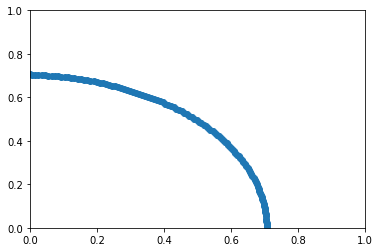

In [38]:
plt.scatter(x,y)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()
